In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [2]:
df = pd.read_csv('open-data/erling_haaland_2022_understat.csv')

In [3]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [4]:
df.X = df.X * 100
df.Y = df.Y * 100

In [5]:
tot_shots = df.shape[0]

In [6]:
tot_goals = df[df.result == 'Goal'].shape[0]
tot_xg = df.xG.sum()
xg_per_shot = tot_xg/tot_shots
points_avg_distance = df.X.mean()

In [7]:
actual_avg_distance = 120 - (df.X * 1.2).mean()

In [8]:
bkg_colour = '#0C0D0E'

In [9]:
import matplotlib.font_manager as font_manager

In [10]:
font_path = 'open-data/Arvo/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

---
## Graphic

Text(0.64, 0, '0.27')

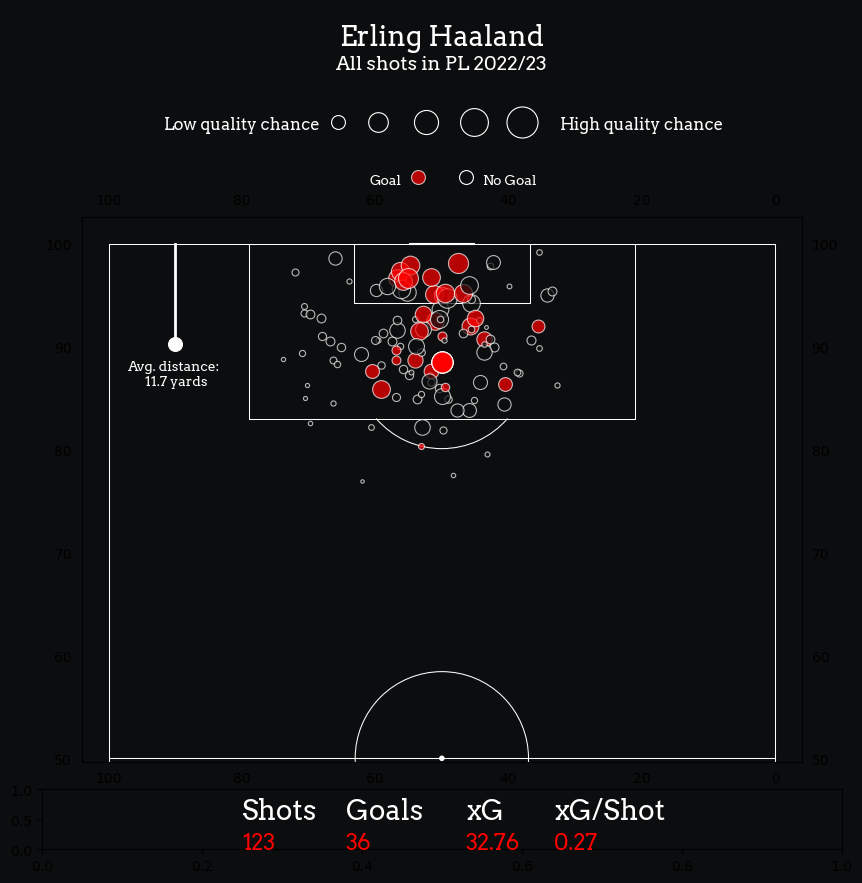

In [11]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(bkg_colour)

ax1 = fig.add_axes([0,0.7,1,0.2])
ax1.set_facecolor(bkg_colour)
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.text(x=.5,y=.85,s='Erling Haaland',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax1.scatter(0.37,0.53,s=100,color=bkg_colour,edgecolor='white',linewidth=0.8)
ax1.scatter(0.42,0.53,s=200,color=bkg_colour,edgecolor='white',linewidth=0.8)
ax1.scatter(0.48,0.53,s=300,color=bkg_colour,edgecolor='white',linewidth=0.8)
ax1.scatter(0.54,0.53,s=400,color=bkg_colour,edgecolor='white',linewidth=0.8)
ax1.scatter(0.6,0.53,s=500,color=bkg_colour,edgecolor='white',linewidth=0.8)

ax1.text(x=.45,y=.27,s=f'Goal',fontsize=10,fontproperties=font_props,fontweight='bold',color='white',ha='right')
ax1.scatter(0.47,0.3,s=100,color='red',edgecolor='white',linewidth=0.8,alpha=0.7)

ax1.text(x=.55,y=.27,s=f'No Goal',fontsize=10,fontproperties=font_props,fontweight='bold',color='white',ha='left')
ax1.scatter(0.53,0.3,s=100,color=bkg_colour,edgecolor='white',linewidth=0.8,alpha=1)




ax1.text(x=.5,y=.75,s='All shots in PL 2022/23',fontsize=14,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax1.text(x=.25,y=.5,s='Low quality chance',fontsize=12,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax1.text(x=.75,y=.5,s='High quality chance',fontsize=12,fontproperties=font_props,fontweight='bold',color='white',ha='center')

ax1.set_axis_off()


ax2 = fig.add_axes([.05,0.25,0.9,0.5])
ax2.set_facecolor(bkg_colour)

pitch = VerticalPitch(pitch_type='opta',half=True,pitch_color=bkg_colour,pad_bottom=0.5,line_color='white',linewidth=0.75,axis=True,label=True)
pitch.draw(ax=ax2)

ax2.scatter(x=90,y=points_avg_distance,s=100,c='white',linewidth=.8)
ax2.plot([90,90],[100,points_avg_distance],color='white',linewidth=2)

ax2.text(90,points_avg_distance-4,s=f'Avg. distance: \n {actual_avg_distance:.1f} yards',fontsize=10,fontproperties=font_props,color='white',ha='center')

for i in df.to_dict(orient='records'):
    pitch.scatter(i['X'],i['Y'],s=300*i['xG'],color='red' if i['result'] == 'Goal' else bkg_colour,ax=ax2,alpha=0.7,linewidth=0.8,edgecolor='white')


ax3 = fig.add_axes([0.,0.2,1,0.05])


ax3.set_facecolor(bkg_colour)


ax3.text(x=.25,y=.5,s='Shots',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='left')
ax3.text(x=.25,y=0,s=f'{tot_shots}',fontsize=16,fontproperties=font_props,color='red',ha='left')


ax3.text(x=.38,y=.5,s='Goals',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='left')
ax3.text(x=.38,y=0,s=f'{tot_goals}',fontsize=16,fontproperties=font_props,color='red',ha='left')


ax3.text(x=.53,y=.5,s='xG',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='left')
ax3.text(x=.53,y=0,s=f'{tot_xg:.2f}',fontsize=16,fontproperties=font_props,color='red',ha='left')


ax3.text(x=.64,y=.5,s='xG/Shot',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='left')
ax3.text(x=.64,y=0,s=f'{xg_per_shot:.2f}',fontsize=16,fontproperties=font_props,fontweight='bold',color='red',ha='left')

---

In [12]:
import understatapi

client = understatapi.UnderstatClient()

### Get Leagues and Matches

In [13]:
league_data = client.league(league="EPL").get_match_data(season="2024")

In [14]:
shot_data = client.match(match=league_data[0]["id"]).get_shot_data()

### Get Players

In [15]:
# from tqdm import tqdm

# def get_all_players():
#     players_dict = {}
#     all_ids = range(100, 9999)
    
#     with understatapi.UnderstatClient() as understat:
#         for player_id in tqdm(all_ids):
#             try:
#                 player = understat.player(player=str(player_id)).get_shot_data()
#                 player_name = player[0]['player']
#                 #print(f"ID: {player_id}, Name: {player_name}")
                
#                 # Simply map ID to name
#                 players_dict[player_id] = player_name
                
#                 time.sleep(0.1)
#             except Exception as e:
#                 continue
    
#     return players_dict


# # Run the function
# players = get_all_players()

In [18]:

def get_players(player,league='EPL',season='2024'):
    """
    Get Players from selected league.

    player: Full player name (working on specifics e.g: letters with accents, first/last names only etc.)
    league: Default is Premier League
    season: Season they were playing in the league (default 2024-25 season). ##This doesn't really matter except for those who were
    """
    all_players = pd.DataFrame(client.league(league=league).get_player_data(season=season))
    player_id = all_players[all_players.player_name == player]['id'].values[0]
    return player_id

def get_shot_data(player_id):
    "Gets all shot data for the player across all seasons."
    shot_data = client.player(player=str(player_id)).get_shot_data()
    return pd.DataFrame(shot_data)


# def get_player_shots(player_id, season="2024"):
#     """Get shot data for a specific player and convert to DataFrame"""
#     with understatapi.UnderstatClient() as client:
#         # Get player shot data
#         shot_data = client.player(player=str(player_id)).get_shot_data()
        
#         # Filter for specific season if needed
#         shot_data = [shot for shot in shot_data if shot['season'] == season]
        
#         # Convert to DataFrame
#         df = pd.DataFrame(shot_data)
        
#         # Convert X,Y coordinates to float
#         df.X = df.X.astype(float) 
#         df.Y = df.Y.astype(float)

In [21]:
dir(client.player(player='479846')

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_args',
 '_get_data',
 '_primary_attr',
 '_request_url',
 'base_url',
 'get_match_data',
 'get_season_data',
 'get_shot_data',
 'leagues',
 'parser',
 'player',
 'session']

In [19]:
pid = get_players('Diogo Jota',season='2024')
df = get_shot_data(pid)

---

In [91]:
def create_shotmap(df, player_name, season='2022',background_color='#0C0D0E', figsize=(8,12)):
    """
    Create a shot map visualization for a player
    
    Parameters:
        df: DataFrame containing shot data
        player_name: Name of the player for the title
        background_color: Color for background (default '#0C0D0E')
        figsize: Size of figure (default (8,12))
    """
    
    # Calculate statistics
    df = df[df.season == season]
    df['X'] = pd.to_numeric(df['X']) * 100  # Convert to numeric and scale
    df['Y'] = pd.to_numeric(df['Y']) * 100
    df['xG'] = pd.to_numeric(df['xG'])
    tot_shots = df.shape[0]
    tot_goals = df[df.result == 'Goal'].shape[0]
    tot_xg = df.xG.astype(float).sum()
    xg_per_shot = tot_xg/tot_shots
    df.X = df.X.astype(float)
    points_avg_distance = df.X.mean()

    actual_avg_distance = 120 - (df.X.values * 1.2).mean()

    # Create figure
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor(background_color)

    # Title and header section
    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background_color)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    # Title and text
    ax1.text(x=0.5, y=.85, s=player_name, fontsize=20, color='white', ha='center')
    ax1.text(x=0.5, y=.7, s='All shots in PL 2022-23', fontsize=14, color='white', ha='center')
    ax1.text(x=0.25, y=.5, s='Low quality chance', fontsize=12, color='white', ha='center')
    ax1.text(x=0.75, y=.5, s='High quality chance', fontsize=12, color='white', ha='center')

    # Legend circles
    circles = [(0.37, 100), (0.42, 200), (0.48, 300), (0.54, 400), (0.6, 500)]
    for x, s in circles:
        ax1.scatter(x, 0.53, s=s, color=background_color, edgecolor='white', linewidth=.8)

    # Goal/No Goal legend
    ax1.text(x=.45, y=.27, s='Goal', fontsize=10, color='white', ha='right')
    ax1.scatter(0.47, 0.3, s=100, color='red', edgecolor='white', linewidth=.8, alpha=0.7)
    ax1.text(x=.55, y=.27, s='No Goal', fontsize=10, color='white', ha='left')
    ax1.scatter(0.53, 0.3, s=100, color=background_color, edgecolor='white', linewidth=.8)

    ax1.set_axis_off()

    # Pitch visualization
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background_color)

    pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=background_color, 
                         pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
    pitch.draw(ax=ax2)

    # Plot shots
    for i in df.to_dict(orient='records'):
        pitch.scatter(float(i['X']), float(i['Y']), s=300*float(i['xG']), 
                     color='red' if i['result'] == 'Goal' else background_color,
                     ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

    # Statistics section
    ax3 = fig.add_axes([0., 0.2, 1, 0.05])
    ax3.set_facecolor(background_color)

    # Add stats text
    stats = [
        ('Shots', tot_shots, 0.25),
        ('Goals', tot_goals, 0.38),
        ('xG', f'{tot_xg:.2f}', 0.53),
        ('xG/Shot', f'{xg_per_shot:.2f}', 0.64)
    ]

    for label, value, x_pos in stats:
        ax3.text(x=x_pos, y=.5, s=label, fontsize=20, color='white', ha='left')
        ax3.text(x=x_pos, y=0, s=str(value), fontsize=16, color='red', ha='left')

    ax3.set_axis_off()
    return fig


/var/folders/bv/h7ss9cs93lq15v21yc62bk600000gn/T/ipykernel_24094/4190650651.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = pd.to_numeric(df['X']) * 100  # Convert to numeric and scale
/var/folders/bv/h7ss9cs93lq15v21yc62bk600000gn/T/ipykernel_24094/4190650651.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = pd.to_numeric(df['Y']) * 100
/var/folders/bv/h7ss9cs93lq15v21yc62bk600000gn/T/ipykernel_24094/4190650651.py:16: SettingWithCopyWarning: 
A value is trying to be set on a cop

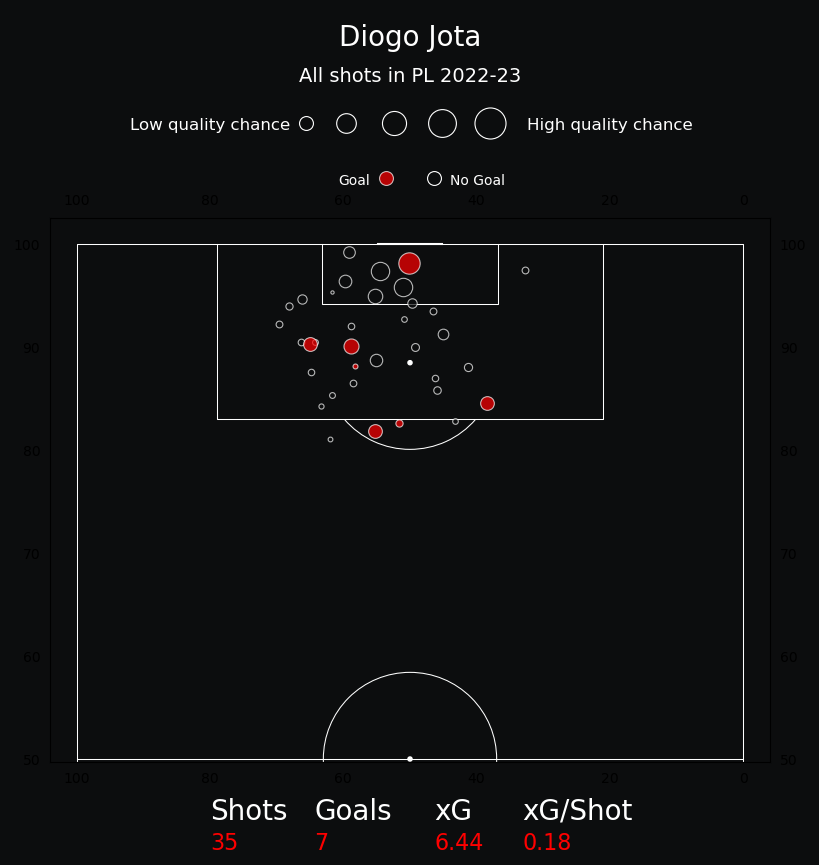

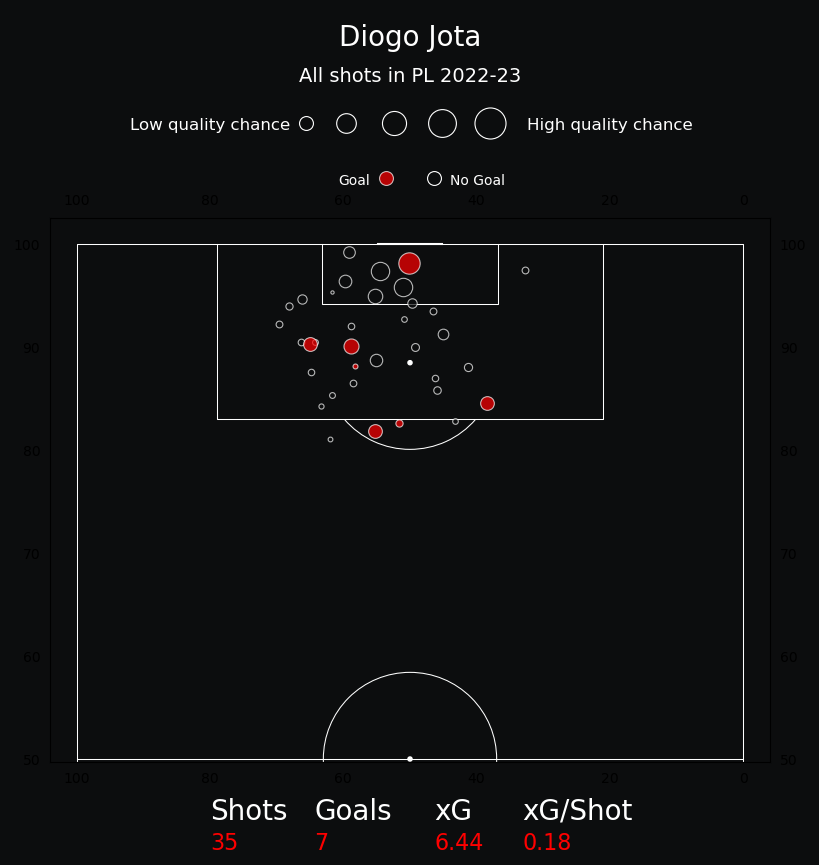

In [92]:
create_shotmap(df, "Diogo Jota")